# Project 1 - Part 2

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales. 

Assignment 

1. Explore the data - what do you need to do to clean this data?
2. Are there missing values in this dataset? Some stores might not report all the data due to technical glitches or other issues. If so, deal with these appropriately. 
3. What are some summary statistics, aggregate information, or other useful trends you can see from the data using Pandas? 

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# filename = '/content/drive/MyDrive/Coding Dojo/Project 1_Sales Predictions/sales_predictions.csv'
raw_df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Project 1_Sales Predictions/sales_predictions.csv',index_col=False)
raw_df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [40]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Assignment**

1. Explore the data - what do you need to do to clean this data?

*   Identify Data Characteristics 
>        Data Types - string and float64 (All float64 align with data dictionary) >>> raw_df.dtypes
>        Data Shape = rows = 8523; columns = 12 >>> raw_df.shape

*   Identify Irrelevant Data
>        Review columns in data dictionary >>> raw_df.columns 
>        Consider removing 'Outlet_Estabilistmennt_Year' as it appears unnessary to the task.
*   Identify Duplicate Data
>        DataFrame shows zero duplicate values >>> raw_df.duplicated().any()








2. Are there missing values in this dataset? Some stores might not report all the data due to technical glitches or other issues. If so, deal with these appropriately.

Identify Missing Data
>        >>> total_df = raw_df.isnull().sum().sort_values(ascending=False)
              percent_missing1 = raw_df.isnull().sum()/raw_df.isnull().count() * 100
              percent_missing2 = (round(percent_missing1, 1)).sort_values(ascending=False)
              missing_table = pd.concat([total_df, percent_missing2, outlet_size],
                          axis=1, keys=['Total','% Missing'])
>        Outlet_Size Missing = (2410, 28%): 'The size of the store in terms of ground area covered'
>        Item_weight Missing = (1463, 17%): 'Weight of product'

In [41]:
total_df = raw_df.isnull().sum().sort_values(ascending=False)
percent_missing1 = raw_df.isnull().sum()/raw_df.isnull().count() * 100
percent_missing2 = (round(percent_missing1, 1)).sort_values(ascending=False)
missing_table = pd.concat([total_df, percent_missing2,],
                          axis=1, keys=['Total','% Missing'])
missing_table.head(2)

,Total,% Missing
Outlet_Size,2410,28.3
Item_Weight,1463,17.2


Imputing Missing Values

*        Identify Mode of 'Outlet_Size'
>        Output: 'Medium' >>> mode_os = raw_df['Outlet_Size'].mode()
*        Identify Mean of 'Item_Weight'
>        Output: '12.15' >>> mode_iw = raw_df['Item_Weight'].mode()
*        Replace Missing Values with Mean
>        Fillna in 'Outlet_Size' = 'Medium' >>> raw_df['Outlet_Size'].fillna('Medium', inplace = True)
>        Fillan in 'Item_Size' = '12.15' >>> raw_df['Item_Weight'].fillna(mode_iw, inplace = True)
>        Output: 8523 non-null

In [42]:
mode_os = raw_df['Outlet_Size'].mode()
mean_iw = int(raw_df['Item_Weight'].mean())
# mean_iv = int(raw_df['Item_Visibility'].mean())

# Replacing 0's with NaN
raw_df.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)
# Now fill by mean of visbility based on item identifiers
raw_df.Item_Visibility = raw_df.Item_Visibility.fillna(raw_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

raw_df['Outlet_Size'].fillna('Medium', inplace = True)
raw_df['Item_Weight'].fillna(mean_iw, inplace = True)
# raw_df['Item_Visibility'].fillna(mean_iv, inplace = True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [43]:
raw_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.710428,0.070749,140.992782,1997.831867,2181.288914
std,4.238481,0.050313,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.031395,93.826500,1987.000000,834.247400
50%,12.000000,0.058100,143.012800,1999.000000,1794.331000
75%,16.000000,0.098867,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


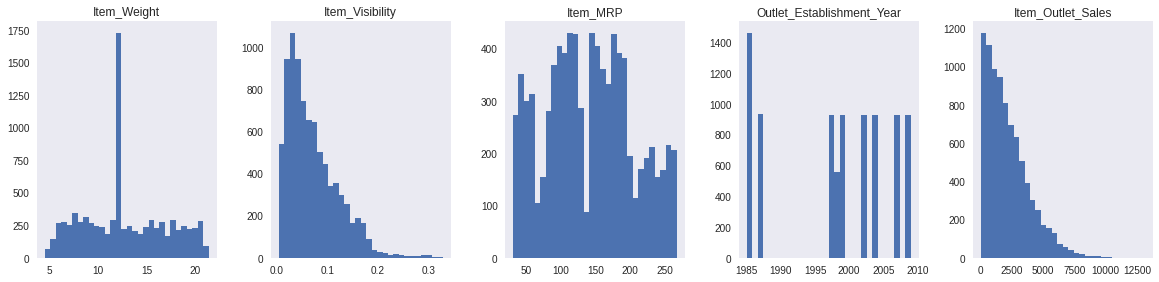

In [44]:
plt.style.use('seaborn')
raw_df.hist(figsize=(20,10), grid=False, layout=(2, 5), bins = 30);

3. What are some summary statistics, aggregate information, or other useful trends you can see from the data using Pandas?

>        1. Total Outlet_ID Count = 10 >>> len(pd.unique(raw_df['Outlet_Identifier']))
>        2. Total Outlet_Type Count = 4 >>> len(pd.unique(raw_df['Outlet_Type']))
>        3. How many Item_ID are there by Outlet_Type?
>        4. Rank Item_Type by Item_ID >>> See below
>        5. Which Outlet_ID had the most ITEM_MRP? >>> See below

In [45]:
sku_count = raw_df.groupby(['Item_Type'])[['Item_Identifier']].count().sort_values(by='Item_Identifier', ascending= False)
sku_count

,Item_Identifier
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [46]:
# 4.
gb_store_sales = raw_df.groupby(['Outlet_Type','Outlet_Identifier']).agg({'Item_Outlet_Sales': 'describe'})
# gb_store_sales = raw_df.groupby(['Outlet_Identifier']).agg({'Item_Outlet_Sales': 'sum'})
gb_store_sales

Item_Outlet_Sales  ...            
                                                count  ...         max
Outlet_Type       Outlet_Identifier                    ...            
Grocery Store     OUT010                        555.0  ...   1775.6886
                  OUT019                        528.0  ...   1482.0708
Supermarket Type1 OUT013                        932.0  ...  10256.6490
                  OUT017                        926.0  ...   9664.7528
                  OUT035                        930.0  ...   8479.6288
                  OUT045                        929.0  ...   8994.9580
                  OUT046                        930.0  ...   9779.9362
                  OUT049                        930.0  ...   7646.0472
Supermarket Type2 OUT018                        928.0  ...   6768.5228
Supermarket Type3 OUT027                        935.0  ...  13086.9648

[10 rows x 8 columns]

In [47]:
# 5.
raw_df.groupby(['Outlet_Identifier'])[['Item_MRP']].sum().sort_values(by='Item_MRP', ascending= False).round(2)

,Item_MRP
Outlet_Identifier,
OUT035,133103.91
OUT046,132113.37
OUT013,131809.02
OUT018,131477.77
OUT045,130942.78
OUT027,130714.67
OUT049,130476.86
OUT017,129103.96
OUT010,78131.56


In [48]:
raw_df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0.0229105,0.0161643
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,Medium,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [49]:
item_mrp = raw_df.groupby(['Item_Type']).Item_MRP.agg(['count','mean','median','min','max','sum'])
item_mrp

,count,mean,median,min,max,sum
Item_Type,,,,,,
Baking Goods,648,126.380766,112.3544,33.9874,265.5568,81894.7364
Breads,251,140.952669,129.1310,31.9558,263.6594,35379.1198
Breakfast,110,141.788151,155.3630,40.0480,234.9300,15596.6966
Canned,649,139.763832,140.1496,36.3506,266.8884,90706.7270
Dairy,682,148.499208,147.5405,33.4874,266.6884,101276.4596
Frozen Foods,856,138.503366,128.6494,31.9558,264.8910,118558.8814
Fruits and Vegetables,1232,144.581235,145.5444,36.2506,264.2252,178124.0810
Hard Drinks,214,137.077928,144.9444,34.2532,261.4278,29334.6766
Health and Hygiene,520,130.818921,128.0349,33.1216,266.6884,68025.8388


In [59]:
item_sales = raw_df.groupby(['Item_Type']).Item_Outlet_Sales.agg(['mean','median','min','max','sum'])
# item_sales = raw_df.groupby(['Item_Type']).agg({'Item_Outlet_Sales': 'describe'})
item_sales

,mean,median,min,max,sum
Item_Type,,,,,
Baking Goods,1952.971207,1577.9460,37.2848,7931.6754,1.265525e+06
Breads,2204.132226,1860.2452,35.2874,8958.3390,5.532372e+05
Breakfast,2111.808651,1554.6430,39.9480,8209.3140,2.322990e+05
Canned,2225.194904,1860.2452,37.9506,10306.5840,1.444151e+06
Dairy,2232.542597,1650.8511,40.6138,10256.6490,1.522594e+06
Frozen Foods,2132.867744,1687.1372,36.6190,9678.0688,1.825735e+06
Fruits and Vegetables,2289.009592,1830.9500,45.2744,12117.5600,2.820060e+06
Hard Drinks,2139.221622,1816.6353,37.9506,7843.1240,4.577934e+05
Health and Hygiene,2010.000265,1669.4935,34.6216,9779.9362,1.045200e+06


In [51]:
#store_sales = raw_df.groupby(['Outlet_Identifier']).Item_Outlet_Sales.agg(['mean','min','max'])

store_sales = raw_df.groupby(['Outlet_Identifier']).Item_Outlet_Sales.agg(['cumsum'])
store_sales

,cumsum
0,3.735138e+03
1,4.434228e+02
2,5.832408e+03
3,7.323800e+02
4,9.947052e+02
...,...
8518,2.142664e+06
8519,2.036725e+06
8520,2.268123e+06
8521,1.851823e+06


In [52]:
raw_df.groupby('Outlet_Identifier').agg({'Item_Outlet_Sales': 'describe'})

Item_Outlet_Sales               ...                        
                              count         mean  ...         75%         max
Outlet_Identifier                                 ...                        
OUT010                        555.0   339.351662  ...   455.40720   1775.6886
OUT013                        932.0  2298.995256  ...  3166.37835  10256.6490
OUT017                        926.0  2340.675263  ...  3096.46935   9664.7528
OUT018                        928.0  1995.498739  ...  2702.64865   6768.5228
OUT019                        528.0   340.329723  ...   460.73360   1482.0708
OUT027                        935.0  3694.038558  ...  4975.52340  13086.9648
OUT035                        930.0  2438.841866  ...  3310.35760   8479.6288
OUT045                        929.0  2192.384798  ...  2929.52000   8994.9580
OUT046                        930.0  2277.844267  ...  3095.63710   9779.9362
OUT049                        930.0  2348.354635  ...  3281.72820   7646.0472

[10 rows x 8 columns]

In [53]:
# get the first two characters of ID
raw_df['Item_Category'] = raw_df['Item_Identifier'].apply(lambda x: x[:2])
# rename to new categories
raw_df['Item_Category'] = raw_df['Item_Category'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
raw_df['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

In [54]:
item_category_sales = raw_df.groupby(['Item_Category']).Item_Outlet_Sales.agg(['count','mean','median','min','max','cumsum'])
# item_sales = raw_df.groupby(['Item_Type']).agg({'Item_Outlet_Sales': 'describe'})
item_sales

,count,mean,median,min,max,sum
Item_Type,,,,,,
Baking Goods,648,1952.971207,1577.9460,37.2848,7931.6754,1.265525e+06
Breads,251,2204.132226,1860.2452,35.2874,8958.3390,5.532372e+05
Breakfast,110,2111.808651,1554.6430,39.9480,8209.3140,2.322990e+05
Canned,649,2225.194904,1860.2452,37.9506,10306.5840,1.444151e+06
Dairy,682,2232.542597,1650.8511,40.6138,10256.6490,1.522594e+06
Frozen Foods,856,2132.867744,1687.1372,36.6190,9678.0688,1.825735e+06
Fruits and Vegetables,1232,2289.009592,1830.9500,45.2744,12117.5600,2.820060e+06
Hard Drinks,214,2139.221622,1816.6353,37.9506,7843.1240,4.577934e+05
Health and Hygiene,520,2010.000265,1669.4935,34.6216,9779.9362,1.045200e+06


In [55]:
# Modify Item_Fat_Content to three categories
raw_df['Item_Fat_Content'] = raw_df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

# Classify Non-Consumerable to Non-Edible in Item_Fat_Content #tidepods
raw_df.loc[raw_df['Item_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
raw_df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [56]:
# convert estabilishment year to years since 2021 (small number will increase optimization)
raw_df['Outlet_Years'] = 2021 - raw_df['Outlet_Establishment_Year']
raw_df['Outlet_Years']

0       22
1       12
2       22
3       23
4       34
        ..
8518    34
8519    19
8520    17
8521    12
8522    24
Name: Outlet_Years, Length: 8523, dtype: int64

In [57]:
raw_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                3
Item_Visibility              8322
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Item_Category                   3
Outlet_Years                    9
dtype: int64

In [58]:
raw_df.to_csv('/content/drive/MyDrive/Coding Dojo/Week 3/clean_sales_prediction.csv',index=False)

**Appendix: Data Dictionary**

**Data Dictionary:**

**Attribute** | **Data Type** |  **Data Sub**|  **Description**
--- | --- | --- | ---
**Item Identifier** | categorical | nominal | Unique product ID
**Item Weight** | numerical | continuous | Weight of product
**Item Fat Content** | categorical | ordinal | Whether the product is low fat or regular
**Item Visibility** | numerical | continuous | The percentage of total display area of all products in a store allocated to the particular product
**Item Type** | categorical | nominal | The category to which the product belongs
**Item MRP** | numerical | continuous | Maximum Retail Price (list price) of the product
**Outlet Identifier** | categorical | nominal | Unique store ID
**Outlet Establishment Year** | numerical | continuous | The year in which store was established
**Outlet Size** | categorical | ordinal | The size of the store in terms of ground area covered
**Outlet Location Type** | categorical | nominal | The type of area in which the store is located
**Outlet Type** | categorical | nominal | Whether the outlet is a grocery store or some sort of supermarket
**Item Outlet Sales** | numerical | continuous | Sales of the product in the particular store. This is the target variable to be predicted.



